In [59]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [60]:
folder = Path(
    "/Users/kristianbraad/Library/CloudStorage/OneDrive-Aarhusuniversitet/"
    "4. Semester/Dataprojekt/Dataprojekt AU 2026/2023 AAR vaskeri data"
)
files = list(folder.glob("PLC*.xlsx"))            # matches PLC, Product....xlsx etc.

dfs = []
for f in files:
    df = pd.read_excel(f, header=2)                         # optionally: sheet_name="Sheet1"
    df["source_file"] = f.name                    # helpful traceability
    dfs.append(df)

all_data = pd.concat(dfs, ignore_index=True)
print(all_data.shape)
print(all_data.columns)

(248711, 7)
Index(['Produkt - Produkt', 'Kassationsårsag (ui)',
       'Stk. tøj per kassationsdato', 'Dage i cirkulation', 'Total antal vask',
       'Unik Kode (ui)', 'source_file'],
      dtype='object')


In [61]:
group_col = "Produkt - Produkt"

groups = {gid: gdf.copy() for gid, gdf in all_data.groupby(group_col, dropna=False)}
print("Number of groups:", len(groups))
print("Example group keys:", list(groups.keys())[:10])



Number of groups: 1958
Example group keys: ['00066 Kokkejakke Sort Lechef P/B', '00100 Unisexben Lårl & Toml Mblåpb', '00101 Kit Kina H 2Indv Mblå Trykkn', '00215 Termojakke Hvid', '00221 Termovest Hvid', '00262 Shorts Hr Grå/Sort P/B', '00264 Forkl M/Smæk Grå P/B', '00281 Sweatshirt Grafitmelan 70/30', '00379 Benkl Vente Navy P/B', '00448 Kedeldr Polar M/H Mblå']


In [62]:
# Grouping
groups = {k: g.copy() for k, g in all_data.groupby(group_col, dropna=False)}

In [63]:
groups["04198 Benkl Hr Navy"]

,Produkt - Produkt,Kassationsårsag (ui),Stk. tøj per kassationsdato,Dage i cirkulation,Total antal vask,Unik Kode (ui),source_file
15343,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,6151,169,00D003914A68,"PLC, Product detaljeret, Aarhus, Okt. 2023.xlsx"
16965,04198 Benkl Hr Navy,Alm.slid uden restværdi,1,2281,151,30155C97D461A7C000A477D5,"PLC, Product detaljeret, Aarhus, Okt. 2023.xlsx"
36764,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,2862,85,00D009C13FEA,"PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx"
41272,04198 Benkl Hr Navy,Misligholdt med restværdi,1,1652,66,00D00589587C,"PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx"
41405,04198 Benkl Hr Navy,Alm.slid uden restværdi,1,1627,76,00D005893876,"PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx"
49842,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,504,1,30155C97D461A6C00092C5E4,"PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx"
49843,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,504,6,30155C97D461A6C00092C6C1,"PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx"
79209,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,5785,153,00D00513814B,"PLC, Product detaljeret, Aarhus, Aug. 2023.xlsx"
146332,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,6688,153,00D0041133A8,"PLC, Product detaljeret, Aarhus, Sep. 2023.xlsx"
146333,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,6688,150,00D00438F331,"PLC, Product detaljeret, Aarhus, Sep. 2023.xlsx"


In [64]:
summary = (
    all_data
    .groupby(["Produkt - Produkt", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .reset_index()
)
print(summary)

                       Produkt - Produkt                 Kassationsårsag (ui)  \
0       00066 Kokkejakke Sort Lechef P/B            Misligholdt med restværdi   
1     00100 Unisexben Lårl & Toml Mblåpb              Alm.slid uden restværdi   
2     00100 Unisexben Lårl & Toml Mblåpb              BTS fejl uden restværdi   
3     00100 Unisexben Lårl & Toml Mblåpb             Bortkommet med restværdi   
4     00100 Unisexben Lårl & Toml Mblåpb                       Fejlopmærkning   
...                                  ...                                  ...   
6011   35040 Benkl Da M/Ela 2 Lom HV P/B  Ødelagt af lommefyld uden restværdi   
6012    35057 Test shorts Aarhus Kommune              Alm.slid uden restværdi   
6013    35057 Test shorts Aarhus Kommune             Bortkommet med restværdi   
6014    35057 Test shorts Aarhus Kommune                         Udgået Model   
6015    35134 Forklæde recycled JTK sort              BTS fejl uden restværdi   

      Stk. tøj per kassatio

In [65]:
most_discarded = (
    all_data
    .groupby("Produkt - Produkt")["Stk. tøj per kassationsdato"]
    .sum()
    .sort_values(ascending=False)
)

most_discarded.head(10)


Produkt - Produkt
09385 T-Shirt Hvid B/P M Arla Tryk    7200
23191 Benkl Mind pullon m opsmøg      7064
01083 T-Shirt unisex hvid k/æ P/B     6779
01589 T-shirt unisex mblå k/æ         6696
13084 T-shirt prowear dame navy pb    6152
14152 Benkl m/lom hvid low risk       5062
28793 Benkl M/Lom Grå Low Risk        4435
12143 Pull on let buks opsmøg mblå    4256
24781 Flex buks da CSR dark rock      4164
09813 T-Shirt Vask                    3781
Name: Stk. tøj per kassationsdato, dtype: int64

# Pie charts for 10 biggest datasets

## 1.

In [66]:
product_name = "09385 T-Shirt Hvid B/P M Arla Tryk"  # change to any product
subset = all_data[all_data["Produkt - Produkt"] == product_name]

pie_data = (
    subset
    .groupby("Kassationsårsag (ui)")["Stk. tøj per kassationsdato"]
    .sum()
)
print(pie_data)


Kassationsårsag (ui)
Alm.slid uden restværdi                   1739
BTS fejl uden restværdi                    845
Beholdningsnedskrivning uden restværdi       1
Fejlopmærkning                              15
Kass. af RETUR,MINIMU,afmeld               348
Misligeholdt pga blæk                      578
Misligholdt med restværdi                 3625
Udgået Model                                45
Videresalg med RESTVÆRDI                     3
Ødelagt af lommefyld med restværdi           1
Name: Stk. tøj per kassationsdato, dtype: int64


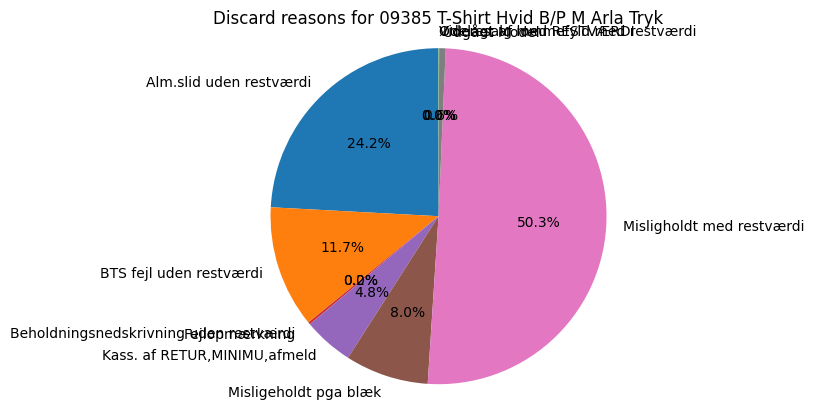

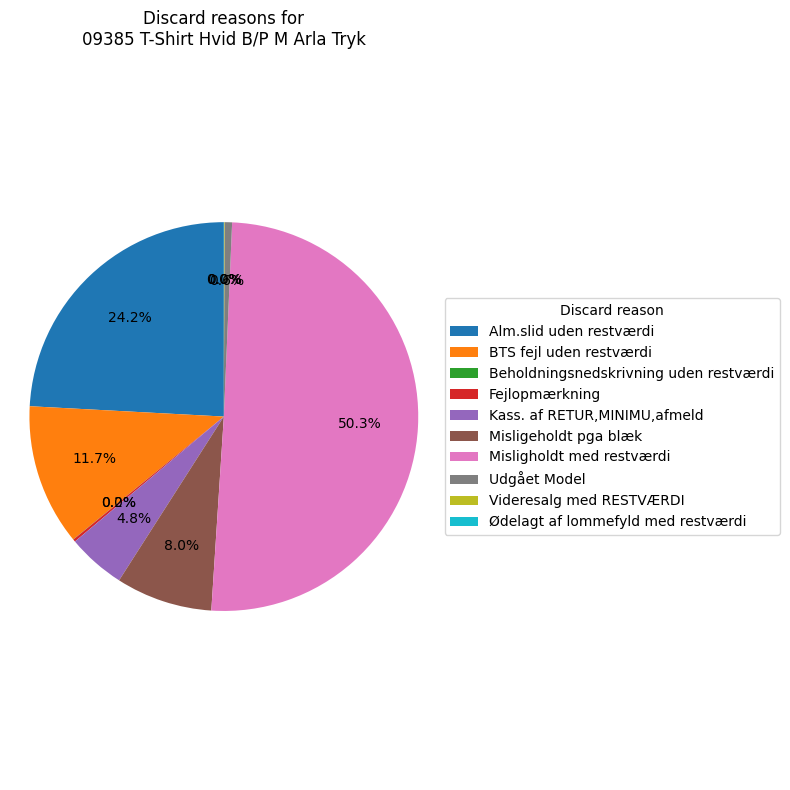

In [67]:
plt.figure()
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Discard reasons for {product_name}")
plt.axis("equal")  # makes the pie round
plt.show()


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    pie_data.index,
    title="Discard reason",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Discard reasons for\n{product_name}")
plt.axis("equal")
plt.tight_layout()
plt.show()



In [68]:
df_p = all_data[all_data["Produkt - Produkt"] == product_name]
summary_reason = (
    df_p
    .groupby("Kassationsårsag (ui)")
    .apply(
        lambda g: pd.Series({
            # lifetime
            "Avg dage i cirkulation": g["Dage i cirkulation"].mean(),
            "Vægtet avg dage i cirkulation": np.average(
                g["Dage i cirkulation"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # washes
            "Avg total vask": g["Total antal vask"].mean(),
            "Vægtet avg total vask": np.average(
                g["Total antal vask"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # volume
            "Antal kasseret": g["Stk. tøj per kassationsdato"].sum()
        })
    )
    .reset_index()
)

summary_reason

/var/folders/hk/1lkjzp1125ncvtglzw709bz40000gn/T/ipykernel_60150/1726214476.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Kassationsårsag (ui),Avg dage i cirkulation,Vægtet avg dage i cirkulation,Avg total vask,Vægtet avg total vask,Antal kasseret
0,Alm.slid uden restværdi,1516.085303,1514.992524,68.814409,68.824037,1739.0
1,BTS fejl uden restværdi,954.063905,954.063905,25.478107,25.478107,845.0
2,Beholdningsnedskrivning uden restværdi,56.000000,56.000000,0.000000,0.000000,1.0
3,Fejlopmærkning,285.066667,285.066667,13.400000,13.400000,15.0
4,"Kass. af RETUR,MINIMU,afmeld",1444.741379,1444.741379,41.755747,41.755747,348.0
5,Misligeholdt pga blæk,1049.669550,1049.669550,45.321799,45.321799,578.0
6,Misligholdt med restværdi,1550.498207,1550.498207,68.208000,68.208000,3625.0
7,Udgået Model,904.755556,904.755556,33.244444,33.244444,45.0
8,Videresalg med RESTVÆRDI,715.333333,715.333333,39.666667,39.666667,3.0
9,Ødelagt af lommefyld med restværdi,918.000000,918.000000,34.000000,34.000000,1.0


## 2.

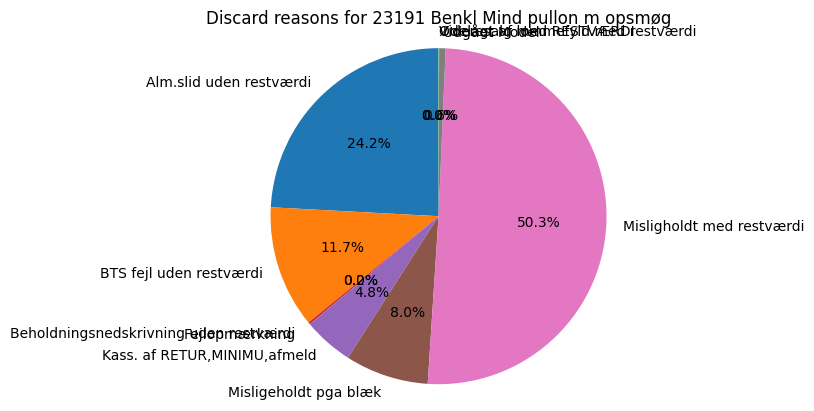

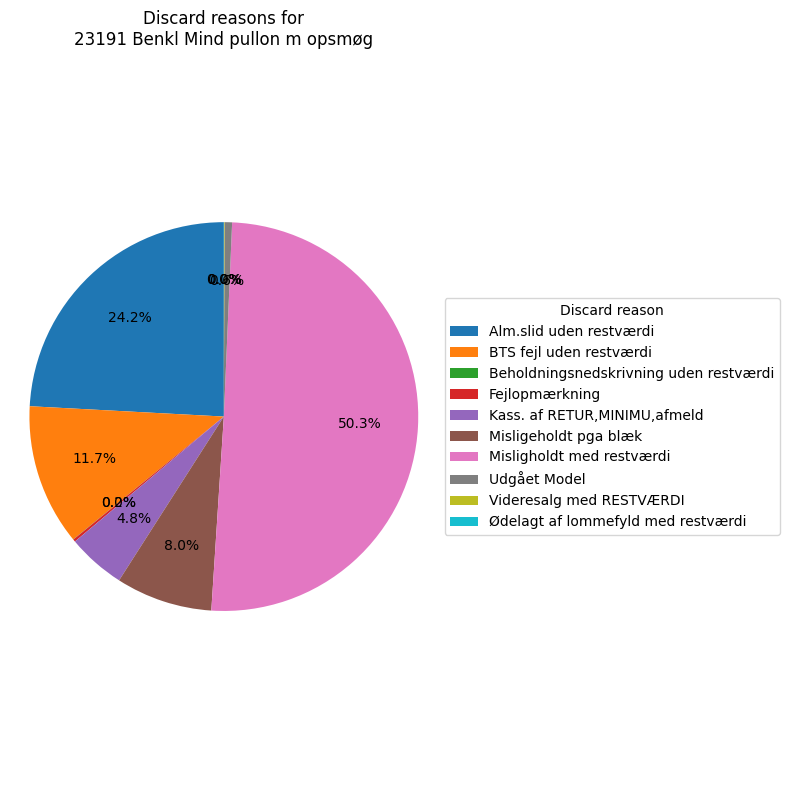

Kassationsårsag (ui)
Alm.slid uden restværdi                4295
BTS fejl uden restværdi                 648
Bortkommet med restværdi               1605
Misligeholdt pga blæk                     2
Misligholdt med restværdi                 3
Produktfejl                               6
Udgået Model                            478
Ødelagt af lommefyld med restværdi        8
Ødelagt af lommefyld uden restværdi      19
Name: Stk. tøj per kassationsdato, dtype: int64


In [69]:
product_name = "23191 Benkl Mind pullon m opsmøg"  # change to any product
subset = all_data[all_data["Produkt - Produkt"] == product_name]
plt.figure()
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Discard reasons for {product_name}")
plt.axis("equal")  # makes the pie round
plt.show()


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    pie_data.index,
    title="Discard reason",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Discard reasons for\n{product_name}")
plt.axis("equal")
plt.tight_layout()
plt.show()

pie_data = (
    subset
    .groupby("Kassationsårsag (ui)")["Stk. tøj per kassationsdato"]
    .sum()
)
print(pie_data)

In [70]:
df_p = all_data[all_data["Produkt - Produkt"] == product_name]
summary_reason = (
    df_p
    .groupby("Kassationsårsag (ui)")
    .apply(
        lambda g: pd.Series({
            # lifetime
            "Avg dage i cirkulation": g["Dage i cirkulation"].mean(),
            "Vægtet avg dage i cirkulation": np.average(
                g["Dage i cirkulation"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # washes
            "Avg total vask": g["Total antal vask"].mean(),
            "Vægtet avg total vask": np.average(
                g["Total antal vask"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # volume
            "Antal kasseret": g["Stk. tøj per kassationsdato"].sum()
        })
    )
    .reset_index()
)

summary_reason

/var/folders/hk/1lkjzp1125ncvtglzw709bz40000gn/T/ipykernel_60150/1726214476.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Kassationsårsag (ui),Avg dage i cirkulation,Vægtet avg dage i cirkulation,Avg total vask,Vægtet avg total vask,Antal kasseret
0,Alm.slid uden restværdi,1128.887052,1128.693597,43.437354,43.431432,4295.0
1,BTS fejl uden restværdi,1311.288580,1311.288580,36.635802,36.635802,648.0
2,Bortkommet med restværdi,1108.887850,1108.887850,26.009346,26.009346,1605.0
3,Misligeholdt pga blæk,317.000000,317.000000,13.000000,13.000000,2.0
4,Misligholdt med restværdi,615.000000,615.000000,17.000000,17.000000,3.0
5,Produktfejl,1426.166667,1426.166667,41.333333,41.333333,6.0
6,Udgået Model,1145.673640,1145.673640,37.797071,37.797071,478.0
7,Ødelagt af lommefyld med restværdi,823.375000,823.375000,31.750000,31.750000,8.0
8,Ødelagt af lommefyld uden restværdi,1337.157895,1337.157895,56.631579,56.631579,19.0


## 3.

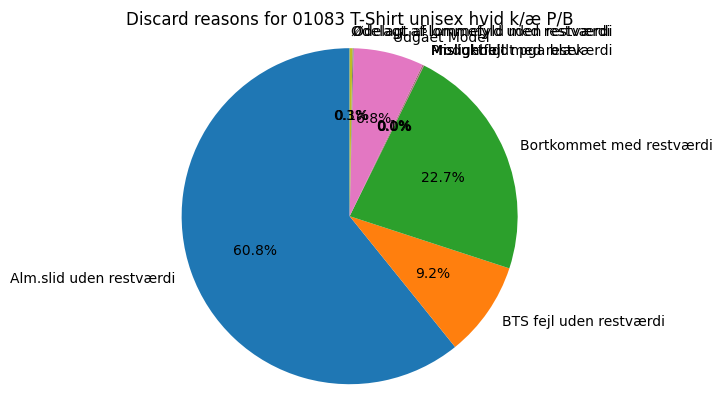

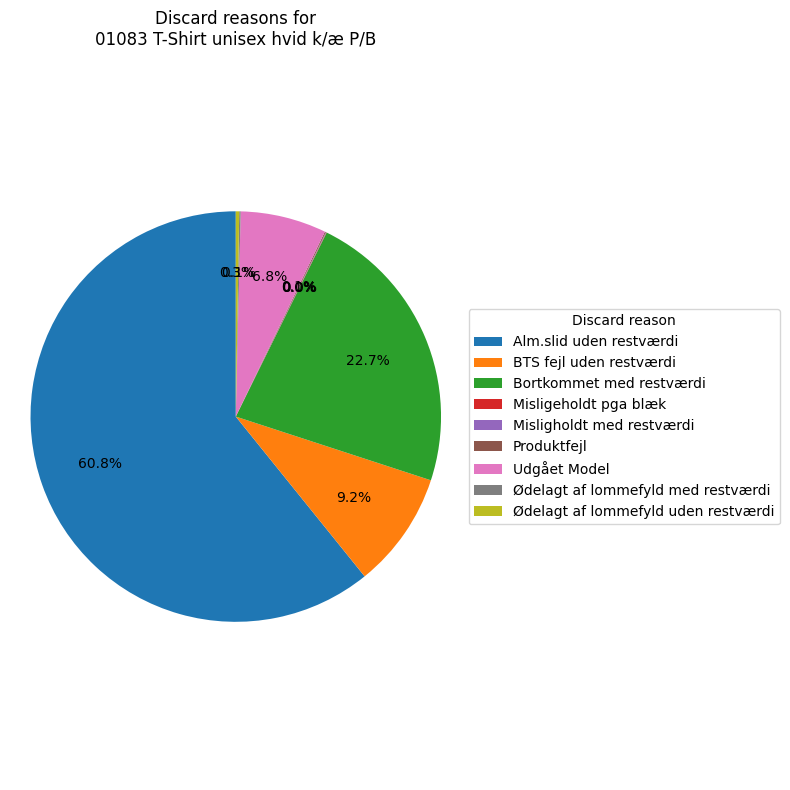

Kassationsårsag (ui)
Alm.slid uden restværdi                   2185
BTS fejl uden restværdi                    679
Beholdningsnedskrivning uden restværdi      67
Bortkommet med restværdi                   157
Fejlopmærkning                               5
Kass. af RETUR,MINIMU,afmeld               425
Misligeholdt pga blæk                      194
Misligholdt med restværdi                 2194
Udgået Model                               826
Videresalg til kunder                       37
Ødelagt af lommefyld uden restværdi         10
Name: Stk. tøj per kassationsdato, dtype: int64


In [71]:
product_name = "01083 T-Shirt unisex hvid k/æ P/B"  # change to any product
subset = all_data[all_data["Produkt - Produkt"] == product_name]
plt.figure()
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Discard reasons for {product_name}")
plt.axis("equal")  # makes the pie round
plt.show()


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    pie_data.index,
    title="Discard reason",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Discard reasons for\n{product_name}")
plt.axis("equal")
plt.tight_layout()
plt.show()

pie_data = (
    subset
    .groupby("Kassationsårsag (ui)")["Stk. tøj per kassationsdato"]
    .sum()
)
print(pie_data)

In [72]:
df_p = all_data[all_data["Produkt - Produkt"] == product_name]
summary_reason = (
    df_p
    .groupby("Kassationsårsag (ui)")
    .apply(
        lambda g: pd.Series({
            # lifetime
            "Avg dage i cirkulation": g["Dage i cirkulation"].mean(),
            "Vægtet avg dage i cirkulation": np.average(
                g["Dage i cirkulation"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # washes
            "Avg total vask": g["Total antal vask"].mean(),
            "Vægtet avg total vask": np.average(
                g["Total antal vask"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # volume
            "Antal kasseret": g["Stk. tøj per kassationsdato"].sum()
        })
    )
    .reset_index()
)

summary_reason

/var/folders/hk/1lkjzp1125ncvtglzw709bz40000gn/T/ipykernel_60150/1726214476.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Kassationsårsag (ui),Avg dage i cirkulation,Vægtet avg dage i cirkulation,Avg total vask,Vægtet avg total vask,Antal kasseret
0,Alm.slid uden restværdi,958.923112,958.923112,54.491533,54.491533,2185.0
1,BTS fejl uden restværdi,1256.124260,1250.575847,36.485207,36.324006,679.0
2,Beholdningsnedskrivning uden restværdi,1789.716418,1789.716418,58.044776,58.044776,67.0
3,Bortkommet med restværdi,573.038217,573.038217,7.414013,7.414013,157.0
4,Fejlopmærkning,92.800000,92.800000,5.600000,5.600000,5.0
5,"Kass. af RETUR,MINIMU,afmeld",2197.105882,2197.105882,30.249412,30.249412,425.0
6,Misligeholdt pga blæk,728.974227,728.974227,38.762887,38.762887,194.0
7,Misligholdt med restværdi,874.586144,874.586144,46.887876,46.887876,2194.0
8,Udgået Model,945.090799,945.090799,33.355932,33.355932,826.0
9,Videresalg til kunder,0.000000,0.000000,0.000000,0.000000,37.0


## 4.

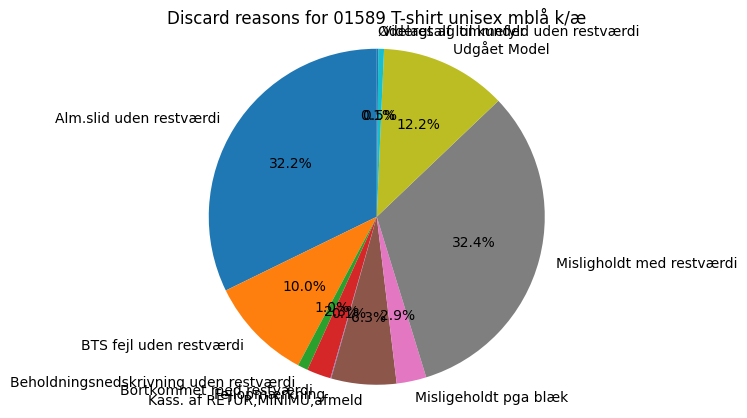

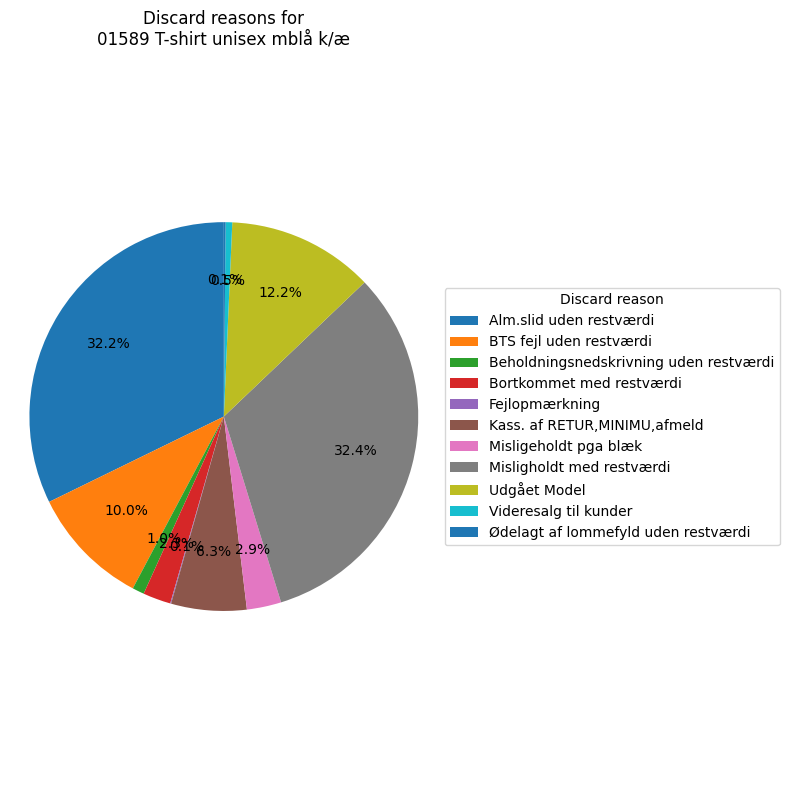

Kassationsårsag (ui)
Alm.slid uden restværdi                   1867
BTS fejl uden restværdi                    485
Beholdningsnedskrivning uden restværdi       3
Bortkommet med restværdi                   813
Kass. af RETUR,MINIMU,afmeld              1336
Misligeholdt pga blæk                       18
Misligholdt med restværdi                 1513
Udgået Model                               646
Videresalg til kunder                        3
Ødelagt af lommefyld med restværdi           1
Ødelagt af lommefyld uden restværdi         11
Name: Stk. tøj per kassationsdato, dtype: int64


In [73]:
product_name = "01589 T-shirt unisex mblå k/æ"  # change to any product
subset = all_data[all_data["Produkt - Produkt"] == product_name]
plt.figure()
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Discard reasons for {product_name}")
plt.axis("equal")  # makes the pie round
plt.show()


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    pie_data.index,
    title="Discard reason",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Discard reasons for\n{product_name}")
plt.axis("equal")
plt.tight_layout()
plt.show()

pie_data = (
    subset
    .groupby("Kassationsårsag (ui)")["Stk. tøj per kassationsdato"]
    .sum()
)
print(pie_data)

In [74]:
df_p = all_data[all_data["Produkt - Produkt"] == product_name]
summary_reason = (
    df_p
    .groupby("Kassationsårsag (ui)")
    .apply(
        lambda g: pd.Series({
            # lifetime
            "Avg dage i cirkulation": g["Dage i cirkulation"].mean(),
            "Vægtet avg dage i cirkulation": np.average(
                g["Dage i cirkulation"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # washes
            "Avg total vask": g["Total antal vask"].mean(),
            "Vægtet avg total vask": np.average(
                g["Total antal vask"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # volume
            "Antal kasseret": g["Stk. tøj per kassationsdato"].sum()
        })
    )
    .reset_index()
)

summary_reason

/var/folders/hk/1lkjzp1125ncvtglzw709bz40000gn/T/ipykernel_60150/1726214476.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Kassationsårsag (ui),Avg dage i cirkulation,Vægtet avg dage i cirkulation,Avg total vask,Vægtet avg total vask,Antal kasseret
0,Alm.slid uden restværdi,1216.686327,1215.597215,45.560858,45.515265,1867.0
1,BTS fejl uden restværdi,1110.989691,1110.989691,17.847423,17.847423,485.0
2,Beholdningsnedskrivning uden restværdi,881.333333,881.333333,33.666667,33.666667,3.0
3,Bortkommet med restværdi,906.188192,906.188192,19.036900,19.036900,813.0
4,"Kass. af RETUR,MINIMU,afmeld",2013.677395,2013.677395,20.234281,20.234281,1336.0
5,Misligeholdt pga blæk,1580.500000,1580.500000,60.166667,60.166667,18.0
6,Misligholdt med restværdi,1268.682750,1268.682750,38.890284,38.890284,1513.0
7,Udgået Model,952.018576,952.018576,21.171827,21.171827,646.0
8,Videresalg til kunder,37.666667,37.666667,0.666667,0.666667,3.0
9,Ødelagt af lommefyld med restværdi,656.000000,656.000000,30.000000,30.000000,1.0


## 5.

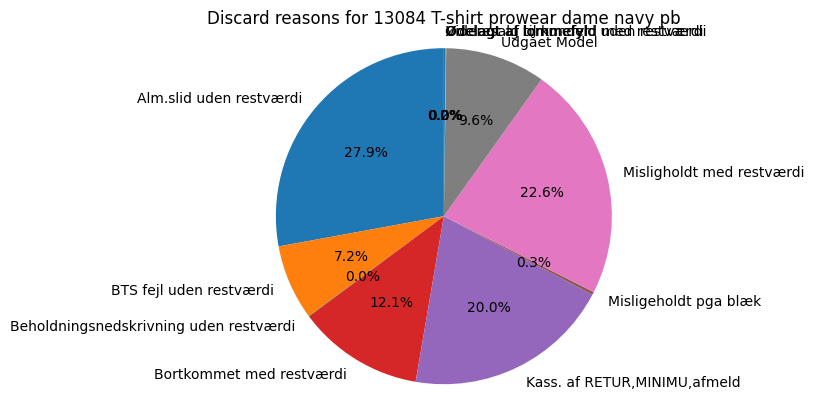

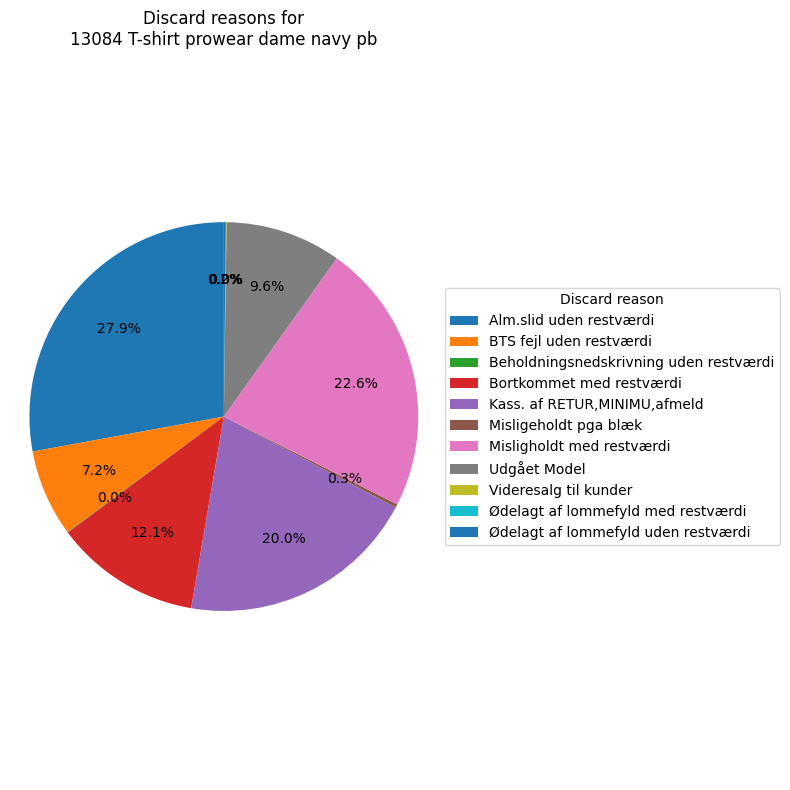

Kassationsårsag (ui)
Alm.slid uden restværdi                3279
BTS fejl uden restværdi                 486
Bortkommet med restværdi               1785
Kass. af RETUR,MINIMU,afmeld             18
Misligeholdt pga blæk                     3
Misligholdt med restværdi                62
Udgået Model                            490
Videresalg til andre BTS afdelinger       6
Ødelagt af lommefyld med restværdi       10
Ødelagt af lommefyld uden restværdi      13
Name: Stk. tøj per kassationsdato, dtype: int64


In [75]:
product_name = "13084 T-shirt prowear dame navy pb"  # change to any product
subset = all_data[all_data["Produkt - Produkt"] == product_name]
plt.figure()
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Discard reasons for {product_name}")
plt.axis("equal")  # makes the pie round
plt.show()


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    pie_data.index,
    title="Discard reason",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Discard reasons for\n{product_name}")
plt.axis("equal")
plt.tight_layout()
plt.show()

pie_data = (
    subset
    .groupby("Kassationsårsag (ui)")["Stk. tøj per kassationsdato"]
    .sum()
)
print(pie_data)

In [76]:
df_p = all_data[all_data["Produkt - Produkt"] == product_name]
summary_reason = (
    df_p
    .groupby("Kassationsårsag (ui)")
    .apply(
        lambda g: pd.Series({
            # lifetime
            "Avg dage i cirkulation": g["Dage i cirkulation"].mean(),
            "Vægtet avg dage i cirkulation": np.average(
                g["Dage i cirkulation"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # washes
            "Avg total vask": g["Total antal vask"].mean(),
            "Vægtet avg total vask": np.average(
                g["Total antal vask"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # volume
            "Antal kasseret": g["Stk. tøj per kassationsdato"].sum()
        })
    )
    .reset_index()
)

summary_reason

/var/folders/hk/1lkjzp1125ncvtglzw709bz40000gn/T/ipykernel_60150/1726214476.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Kassationsårsag (ui),Avg dage i cirkulation,Vægtet avg dage i cirkulation,Avg total vask,Vægtet avg total vask,Antal kasseret
0,Alm.slid uden restværdi,990.093016,990.093016,44.665752,44.665752,3279.0
1,BTS fejl uden restværdi,619.135802,619.135802,12.648148,12.648148,486.0
2,Bortkommet med restværdi,1083.663866,1083.663866,24.728852,24.728852,1785.0
3,"Kass. af RETUR,MINIMU,afmeld",717.611111,717.611111,9.666667,9.666667,18.0
4,Misligeholdt pga blæk,382.666667,382.666667,15.666667,15.666667,3.0
5,Misligholdt med restværdi,688.951613,688.951613,21.580645,21.580645,62.0
6,Udgået Model,648.891837,648.891837,27.191837,27.191837,490.0
7,Videresalg til andre BTS afdelinger,271.333333,271.333333,4.166667,4.166667,6.0
8,Ødelagt af lommefyld med restværdi,953.500000,953.500000,31.700000,31.700000,10.0
9,Ødelagt af lommefyld uden restværdi,1091.923077,1091.923077,44.384615,44.384615,13.0


## 6.

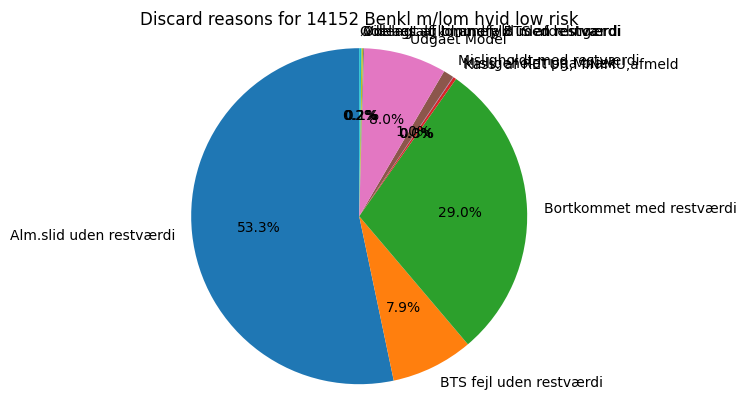

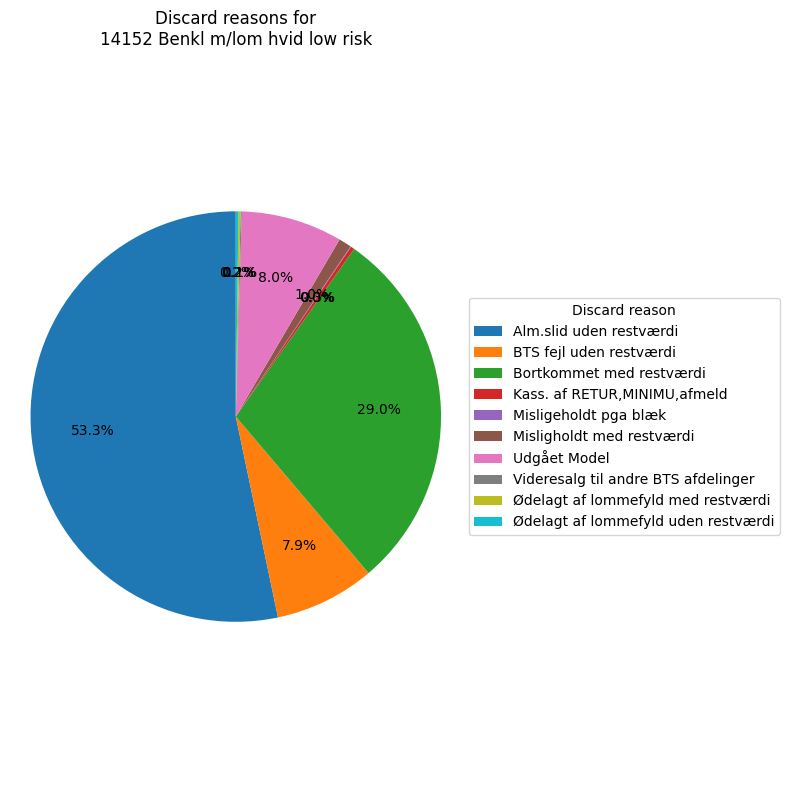

Kassationsårsag (ui)
Alm.slid uden restværdi                    933
BTS fejl uden restværdi                   1130
Beholdningsnedskrivning uden restværdi       8
Fejlopmærkning                               1
Kass. af RETUR,MINIMU,afmeld               197
Misligeholdt pga blæk                      805
Misligholdt med restværdi                 1583
Produktfejl                                  1
Udgået Model                               347
Videresalg til andre BTS afdelinger         57
Name: Stk. tøj per kassationsdato, dtype: int64


In [77]:
product_name = "14152 Benkl m/lom hvid low risk"  # change to any product
subset = all_data[all_data["Produkt - Produkt"] == product_name]
plt.figure()
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Discard reasons for {product_name}")
plt.axis("equal")  # makes the pie round
plt.show()


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    pie_data.index,
    title="Discard reason",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Discard reasons for\n{product_name}")
plt.axis("equal")
plt.tight_layout()
plt.show()

pie_data = (
    subset
    .groupby("Kassationsårsag (ui)")["Stk. tøj per kassationsdato"]
    .sum()
)
print(pie_data)

In [78]:
df_p = all_data[all_data["Produkt - Produkt"] == product_name]
summary_reason = (
    df_p
    .groupby("Kassationsårsag (ui)")
    .apply(
        lambda g: pd.Series({
            # lifetime
            "Avg dage i cirkulation": g["Dage i cirkulation"].mean(),
            "Vægtet avg dage i cirkulation": np.average(
                g["Dage i cirkulation"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # washes
            "Avg total vask": g["Total antal vask"].mean(),
            "Vægtet avg total vask": np.average(
                g["Total antal vask"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # volume
            "Antal kasseret": g["Stk. tøj per kassationsdato"].sum()
        })
    )
    .reset_index()
)

summary_reason

/var/folders/hk/1lkjzp1125ncvtglzw709bz40000gn/T/ipykernel_60150/1726214476.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Kassationsårsag (ui),Avg dage i cirkulation,Vægtet avg dage i cirkulation,Avg total vask,Vægtet avg total vask,Antal kasseret
0,Alm.slid uden restværdi,1414.959271,1414.959271,70.366559,70.366559,933.0
1,BTS fejl uden restværdi,2058.752212,2058.752212,40.780531,40.780531,1130.0
2,Beholdningsnedskrivning uden restværdi,2124.875000,2124.875000,80.625000,80.625000,8.0
3,Fejlopmærkning,989.000000,989.000000,42.000000,42.000000,1.0
4,"Kass. af RETUR,MINIMU,afmeld",1369.218274,1369.218274,38.781726,38.781726,197.0
5,Misligeholdt pga blæk,1147.154037,1147.154037,61.029814,61.029814,805.0
6,Misligholdt med restværdi,1155.950095,1155.950095,55.894504,55.894504,1583.0
7,Produktfejl,2059.000000,2059.000000,118.000000,118.000000,1.0
8,Udgået Model,753.809798,753.809798,29.827089,29.827089,347.0
9,Videresalg til andre BTS afdelinger,132.035088,132.035088,2.192982,2.192982,57.0


## 7.

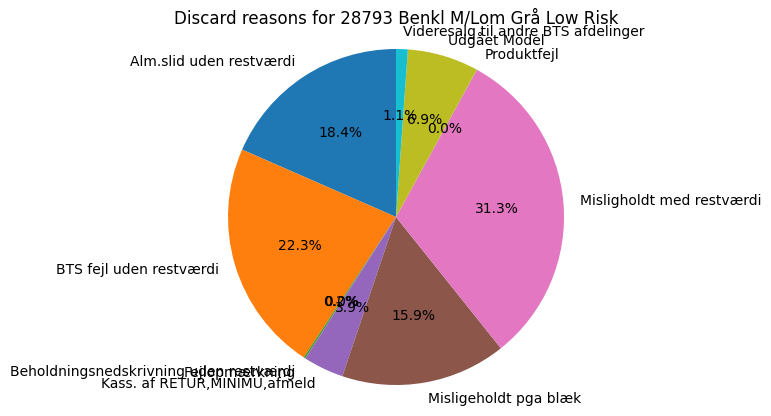

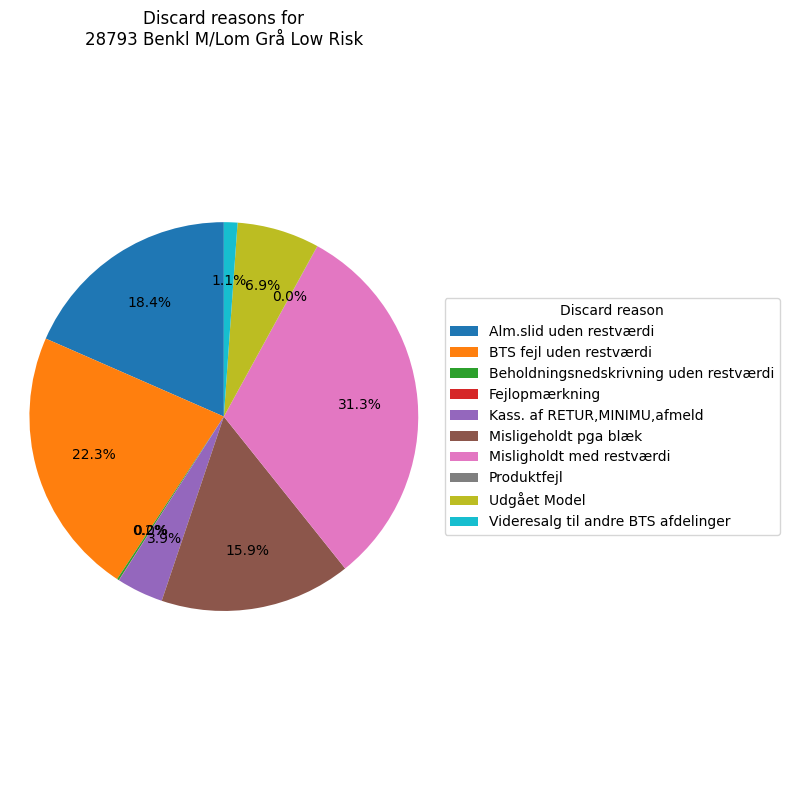

Kassationsårsag (ui)
Alm.slid uden restværdi                    141
BTS fejl uden restværdi                   1344
Beholdningsnedskrivning uden restværdi       2
Fejlopmærkning                               9
Kass. af RETUR,MINIMU,afmeld                74
Misligeholdt pga blæk                     1057
Misligholdt med restværdi                  426
Produktfejl                               1248
Udgået Model                               134
Name: Stk. tøj per kassationsdato, dtype: int64


In [79]:
product_name = "28793 Benkl M/Lom Grå Low Risk"  # change to any product
subset = all_data[all_data["Produkt - Produkt"] == product_name]
plt.figure()
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Discard reasons for {product_name}")
plt.axis("equal")  # makes the pie round
plt.show()


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    pie_data.index,
    title="Discard reason",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Discard reasons for\n{product_name}")
plt.axis("equal")
plt.tight_layout()
plt.show()

pie_data = (
    subset
    .groupby("Kassationsårsag (ui)")["Stk. tøj per kassationsdato"]
    .sum()
)
print(pie_data)

In [80]:
df_p = all_data[all_data["Produkt - Produkt"] == product_name]
summary_reason = (
    df_p
    .groupby("Kassationsårsag (ui)")
    .apply(
        lambda g: pd.Series({
            # lifetime
            "Avg dage i cirkulation": g["Dage i cirkulation"].mean(),
            "Vægtet avg dage i cirkulation": np.average(
                g["Dage i cirkulation"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # washes
            "Avg total vask": g["Total antal vask"].mean(),
            "Vægtet avg total vask": np.average(
                g["Total antal vask"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # volume
            "Antal kasseret": g["Stk. tøj per kassationsdato"].sum()
        })
    )
    .reset_index()
)

summary_reason

/var/folders/hk/1lkjzp1125ncvtglzw709bz40000gn/T/ipykernel_60150/1726214476.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Kassationsårsag (ui),Avg dage i cirkulation,Vægtet avg dage i cirkulation,Avg total vask,Vægtet avg total vask,Antal kasseret
0,Alm.slid uden restværdi,173.808511,173.808511,10.546099,10.546099,141.0
1,BTS fejl uden restværdi,50.250744,50.250744,1.108631,1.108631,1344.0
2,Beholdningsnedskrivning uden restværdi,261.000000,261.000000,5.500000,5.500000,2.0
3,Fejlopmærkning,258.555556,258.555556,12.111111,12.111111,9.0
4,"Kass. af RETUR,MINIMU,afmeld",418.810811,418.810811,6.959459,6.959459,74.0
5,Misligeholdt pga blæk,288.822138,288.822138,14.838221,14.838221,1057.0
6,Misligholdt med restværdi,272.089202,272.089202,12.812207,12.812207,426.0
7,Produktfejl,338.645032,338.645032,9.264423,9.264423,1248.0
8,Udgået Model,231.390977,230.992537,9.315789,9.402985,134.0


## 8.

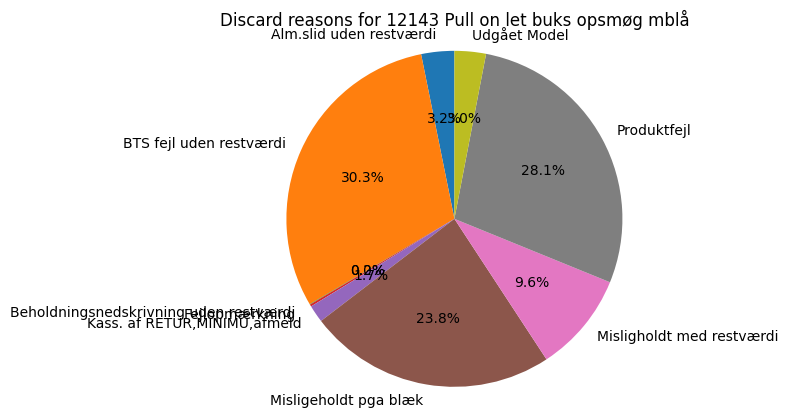

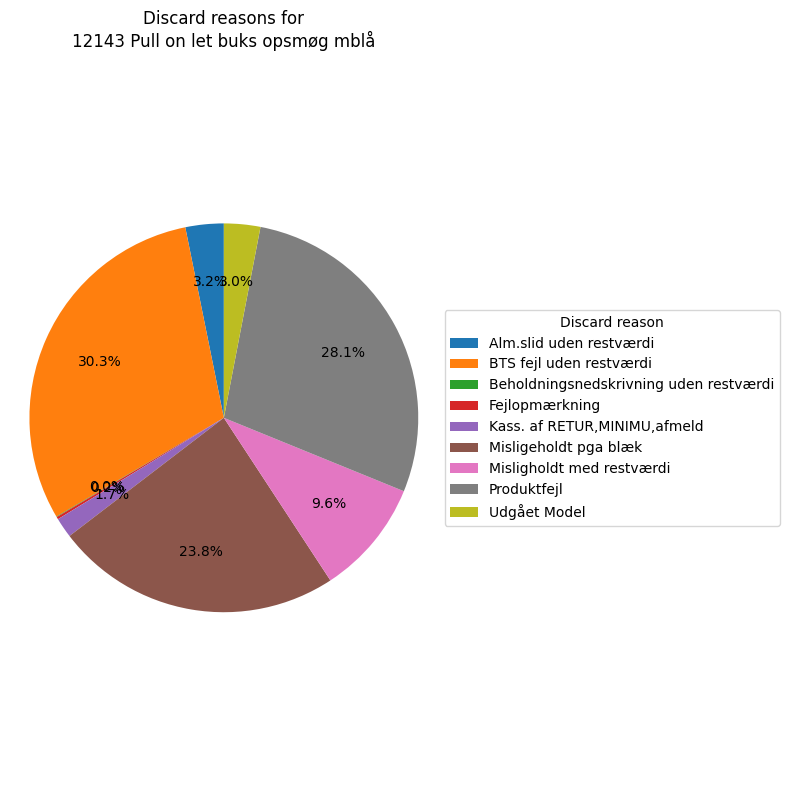

Kassationsårsag (ui)
Alm.slid uden restværdi                   2022
BTS fejl uden restværdi                    267
Beholdningsnedskrivning uden restværdi       2
Bortkommet med restværdi                   265
Fejlopmærkning                               1
Kass. af RETUR,MINIMU,afmeld                47
Misligholdt med restværdi                   12
Udgået Model                              1633
Ødelagt af lommefyld uden restværdi          7
Name: Stk. tøj per kassationsdato, dtype: int64


In [81]:
product_name = "12143 Pull on let buks opsmøg mblå"  # change to any product
subset = all_data[all_data["Produkt - Produkt"] == product_name]
plt.figure()
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Discard reasons for {product_name}")
plt.axis("equal")  # makes the pie round
plt.show()


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    pie_data.index,
    title="Discard reason",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Discard reasons for\n{product_name}")
plt.axis("equal")
plt.tight_layout()
plt.show()

pie_data = (
    subset
    .groupby("Kassationsårsag (ui)")["Stk. tøj per kassationsdato"]
    .sum()
)
print(pie_data)

In [82]:
df_p = all_data[all_data["Produkt - Produkt"] == product_name]
summary_reason = (
    df_p
    .groupby("Kassationsårsag (ui)")
    .apply(
        lambda g: pd.Series({
            # lifetime
            "Avg dage i cirkulation": g["Dage i cirkulation"].mean(),
            "Vægtet avg dage i cirkulation": np.average(
                g["Dage i cirkulation"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # washes
            "Avg total vask": g["Total antal vask"].mean(),
            "Vægtet avg total vask": np.average(
                g["Total antal vask"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # volume
            "Antal kasseret": g["Stk. tøj per kassationsdato"].sum()
        })
    )
    .reset_index()
)

summary_reason

/var/folders/hk/1lkjzp1125ncvtglzw709bz40000gn/T/ipykernel_60150/1726214476.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Kassationsårsag (ui),Avg dage i cirkulation,Vægtet avg dage i cirkulation,Avg total vask,Vægtet avg total vask,Antal kasseret
0,Alm.slid uden restværdi,1325.491592,1325.491592,63.475767,63.475767,2022.0
1,BTS fejl uden restværdi,1528.453184,1528.453184,47.872659,47.872659,267.0
2,Beholdningsnedskrivning uden restværdi,1406.000000,1406.000000,77.500000,77.500000,2.0
3,Bortkommet med restværdi,1168.935849,1168.935849,39.822642,39.822642,265.0
4,Fejlopmærkning,821.000000,821.000000,47.000000,47.000000,1.0
5,"Kass. af RETUR,MINIMU,afmeld",1789.638298,1789.638298,42.872340,42.872340,47.0
6,Misligholdt med restværdi,1383.666667,1383.666667,49.333333,49.333333,12.0
7,Udgået Model,1624.867116,1624.867116,68.592774,68.592774,1633.0
8,Ødelagt af lommefyld uden restværdi,1168.428571,1168.428571,81.000000,81.000000,7.0


## 9.

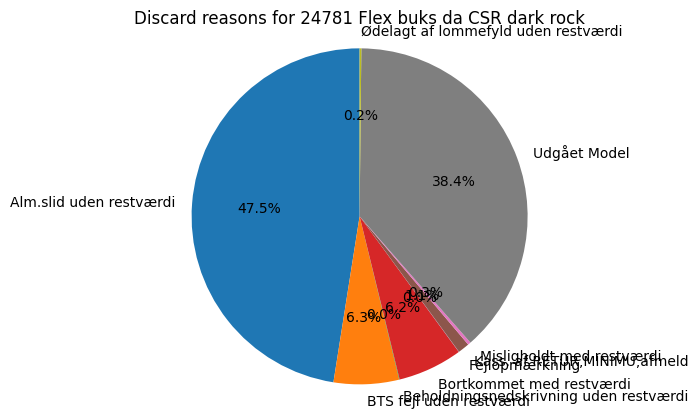

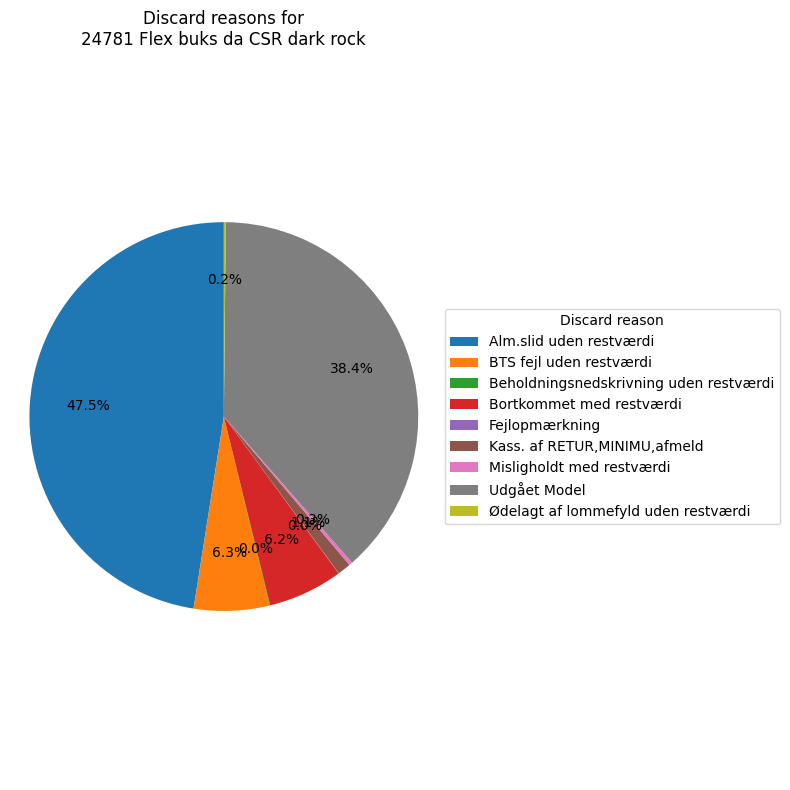

Kassationsårsag (ui)
Alm.slid uden restværdi                   3147
BTS fejl uden restværdi                     21
Beholdningsnedskrivning uden restværdi       1
Bortkommet med restværdi                   597
Misligeholdt pga blæk                        3
Misligholdt med restværdi                   20
Udgået Model                               336
Ødelagt af lommefyld med restværdi           1
Ødelagt af lommefyld uden restværdi         38
Name: Stk. tøj per kassationsdato, dtype: int64


In [83]:
product_name = "24781 Flex buks da CSR dark rock"  # change to any product
subset = all_data[all_data["Produkt - Produkt"] == product_name]
plt.figure()
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Discard reasons for {product_name}")
plt.axis("equal")  # makes the pie round
plt.show()


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    pie_data.index,
    title="Discard reason",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Discard reasons for\n{product_name}")
plt.axis("equal")
plt.tight_layout()
plt.show()

pie_data = (
    subset
    .groupby("Kassationsårsag (ui)")["Stk. tøj per kassationsdato"]
    .sum()
)
print(pie_data)

In [84]:
df_p = all_data[all_data["Produkt - Produkt"] == product_name]
summary_reason = (
    df_p
    .groupby("Kassationsårsag (ui)")
    .apply(
        lambda g: pd.Series({
            # lifetime
            "Avg dage i cirkulation": g["Dage i cirkulation"].mean(),
            "Vægtet avg dage i cirkulation": np.average(
                g["Dage i cirkulation"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # washes
            "Avg total vask": g["Total antal vask"].mean(),
            "Vægtet avg total vask": np.average(
                g["Total antal vask"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # volume
            "Antal kasseret": g["Stk. tøj per kassationsdato"].sum()
        })
    )
    .reset_index()
)

summary_reason

/var/folders/hk/1lkjzp1125ncvtglzw709bz40000gn/T/ipykernel_60150/1726214476.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Kassationsårsag (ui),Avg dage i cirkulation,Vægtet avg dage i cirkulation,Avg total vask,Vægtet avg total vask,Antal kasseret
0,Alm.slid uden restværdi,997.778837,997.778837,57.731808,57.731808,3147.0
1,BTS fejl uden restværdi,597.238095,597.238095,27.333333,27.333333,21.0
2,Beholdningsnedskrivning uden restværdi,81.000000,81.000000,2.000000,2.000000,1.0
3,Bortkommet med restværdi,754.695142,754.695142,22.192630,22.192630,597.0
4,Misligeholdt pga blæk,435.666667,435.666667,19.000000,19.000000,3.0
5,Misligholdt med restværdi,958.300000,958.300000,34.250000,34.250000,20.0
6,Udgået Model,753.583333,753.583333,39.029762,39.029762,336.0
7,Ødelagt af lommefyld med restværdi,1351.000000,1351.000000,69.000000,69.000000,1.0
8,Ødelagt af lommefyld uden restværdi,1064.421053,1064.421053,67.710526,67.710526,38.0


## 10.

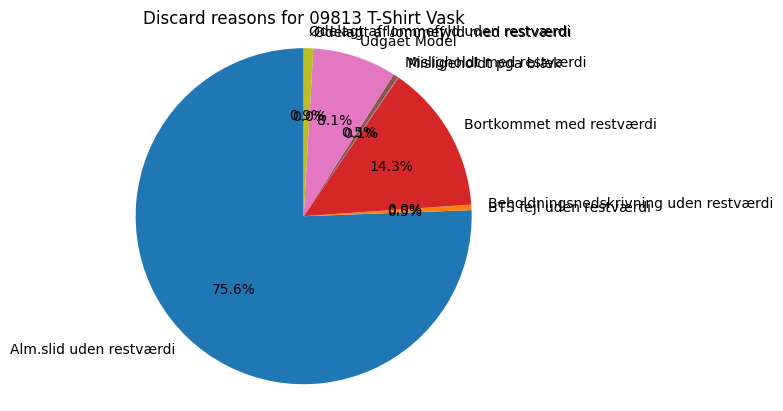

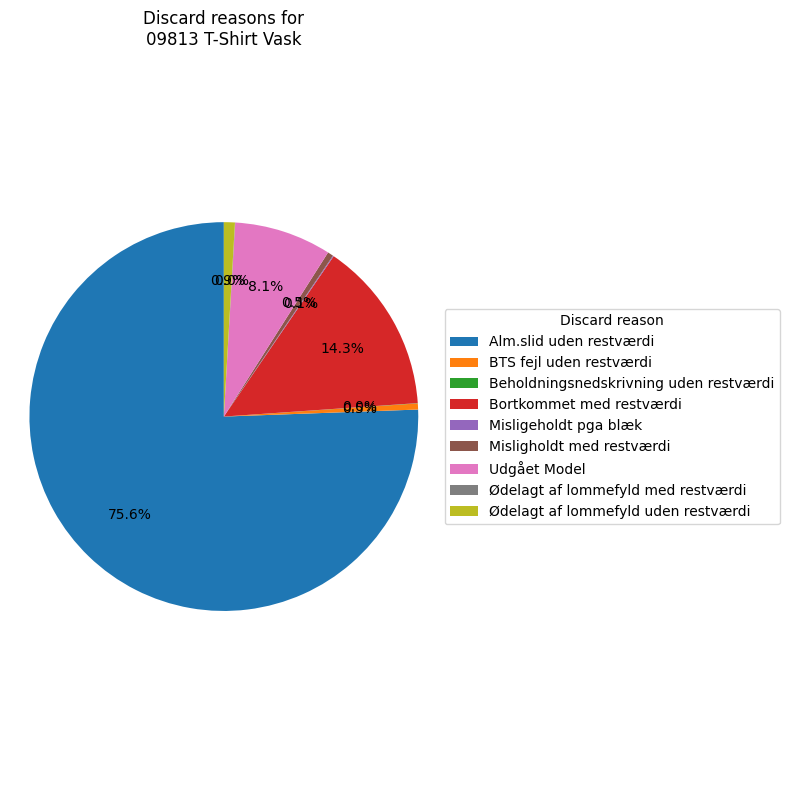

Kassationsårsag (ui)
Alm.slid uden restværdi           19
BTS fejl uden restværdi          557
Kass. af RETUR,MINIMU,afmeld    3033
Udgået Model                     172
Name: Stk. tøj per kassationsdato, dtype: int64


In [85]:
product_name = "09813 T-Shirt Vask"  # change to any product
subset = all_data[all_data["Produkt - Produkt"] == product_name]
plt.figure()
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Discard reasons for {product_name}")
plt.axis("equal")  # makes the pie round
plt.show()


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    pie_data.index,
    title="Discard reason",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Discard reasons for\n{product_name}")
plt.axis("equal")
plt.tight_layout()
plt.show()

pie_data = (
    subset
    .groupby("Kassationsårsag (ui)")["Stk. tøj per kassationsdato"]
    .sum()
)
print(pie_data)

In [86]:
df_p = all_data[all_data["Produkt - Produkt"] == product_name]
summary_reason = (
    df_p
    .groupby("Kassationsårsag (ui)")
    .apply(
        lambda g: pd.Series({
            # lifetime
            "Avg dage i cirkulation": g["Dage i cirkulation"].mean(),
            "Vægtet avg dage i cirkulation": np.average(
                g["Dage i cirkulation"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # washes
            "Avg total vask": g["Total antal vask"].mean(),
            "Vægtet avg total vask": np.average(
                g["Total antal vask"],
                weights=g["Stk. tøj per kassationsdato"]
            ),

            # volume
            "Antal kasseret": g["Stk. tøj per kassationsdato"].sum()
        })
    )
    .reset_index()
)

summary_reason

/var/folders/hk/1lkjzp1125ncvtglzw709bz40000gn/T/ipykernel_60150/1726214476.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Kassationsårsag (ui),Avg dage i cirkulation,Vægtet avg dage i cirkulation,Avg total vask,Vægtet avg total vask,Antal kasseret
0,Alm.slid uden restværdi,263.947368,263.947368,6.157895,6.157895,19.0
1,BTS fejl uden restværdi,986.229803,986.229803,9.881508,9.881508,557.0
2,"Kass. af RETUR,MINIMU,afmeld",1358.165183,1358.165183,8.715463,8.715463,3033.0
3,Udgået Model,64.610465,64.610465,0.127907,0.127907,172.0
